In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13']
train_raw = pd.read_csv('TrainOnMe.csv')[['y']+features]
test_raw = pd.read_csv('EvaluateOnMe.csv')[features]

In [3]:
display(train_raw)
display(test_raw)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Antrophic,199.84675,-0.22935,-94.57266,-0.90297,229.65733,-119.73784,Q4,0.12045,0.50670,13.31960,2.86055,True,951.94743
1,OpenAI,199.76663,0.57961,-98.69548,-0.89087,229.58771,-117.92856,Q4,-0.28505,0.16832,14.52734,-0.51453,True,949.48540
2,Antrophic,200.40804,-0.03834,-97.64719,-0.89971,230.20797,-121.71234,Q3,-0.13753,0.71530,9.90651,0.35612,True,953.21660
3,Antrophic,201.38523,0.51942,-105.16820,-0.89226,231.15781,-120.69422,Q2,0.03872,-0.37550,11.10684,1.32156,True,954.34203
4,OpenAI,199.60130,-0.76663,-94.42670,-0.88284,229.39822,-122.24543,Q4,0.46721,2.14220,9.72683,-4.96100,True,950.79316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,OpenAI,199.98926,-0.41084,-96.07238,-0.89343,229.82210,-122.31199,Q4,-1.46550,-0.52188,9.32058,-5.41452,True,951.91011
4996,OpenAI,198.55424,-1.26159,-100.74327,-0.89437,228.38267,-118.38499,Boom!,-0.50682,1.87498,11.96868,-1.71323,True,942.39957
4997,Mistral,198.82996,-0.63317,-99.51654,-0.88107,228.61067,-118.17930,Boom!,-0.40644,0.61261,12.00800,-0.66953,True,944.39151
4998,OpenAI,200.17363,-0.36923,-101.12964,-0.89290,229.99216,-120.53125,Q3,-0.62150,0.97174,10.39919,-6.26654,True,950.30334


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,200.16482,-0.26286,-97.71010,-0.89489,229.96954,-120.53342,Q3,0.78091,-0.09718,9.52442,3.17744,True,951.96903
1,199.54172,0.40905,-100.63736,-0.88896,229.33501,-120.01444,Q4,-0.46364,-2.63335,12.39610,-1.47704,True,947.38992
2,201.00071,0.14955,-98.64403,-0.88369,230.76183,-120.01524,Q2,0.89600,-1.21155,11.46621,4.65774,True,955.68154
3,199.79682,2.10760,-99.21798,-0.88805,229.58575,-118.51331,Q4,-1.34531,-0.37638,9.08931,0.93612,True,949.37509
4,199.12434,0.41191,-103.65685,-0.88177,228.92722,-118.46355,Q4,2.15090,1.89268,11.01687,-0.31611,True,943.79329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,198.23317,-0.04672,-97.35953,-0.88230,228.02385,-121.45941,Boom!,1.81188,-1.81356,12.91771,-5.06055,True,942.48610
9996,199.90617,0.42708,-100.51298,-0.89519,229.70554,-122.07958,Q4,1.46100,-0.36353,9.46819,3.04122,True,949.27436
9997,200.74392,1.06337,-99.16674,-0.88327,230.52623,-122.10346,Q3,1.81403,-0.62805,12.79995,-3.69950,True,954.13625
9998,200.59772,-0.57665,-100.04636,-0.87773,230.39716,-122.62023,Q3,-1.62298,-2.15419,15.51824,-1.16185,True,952.96541


In [4]:
train_raw['y'].unique()

array(['Antrophic', 'OpenAI', 'Mistral'], dtype=object)

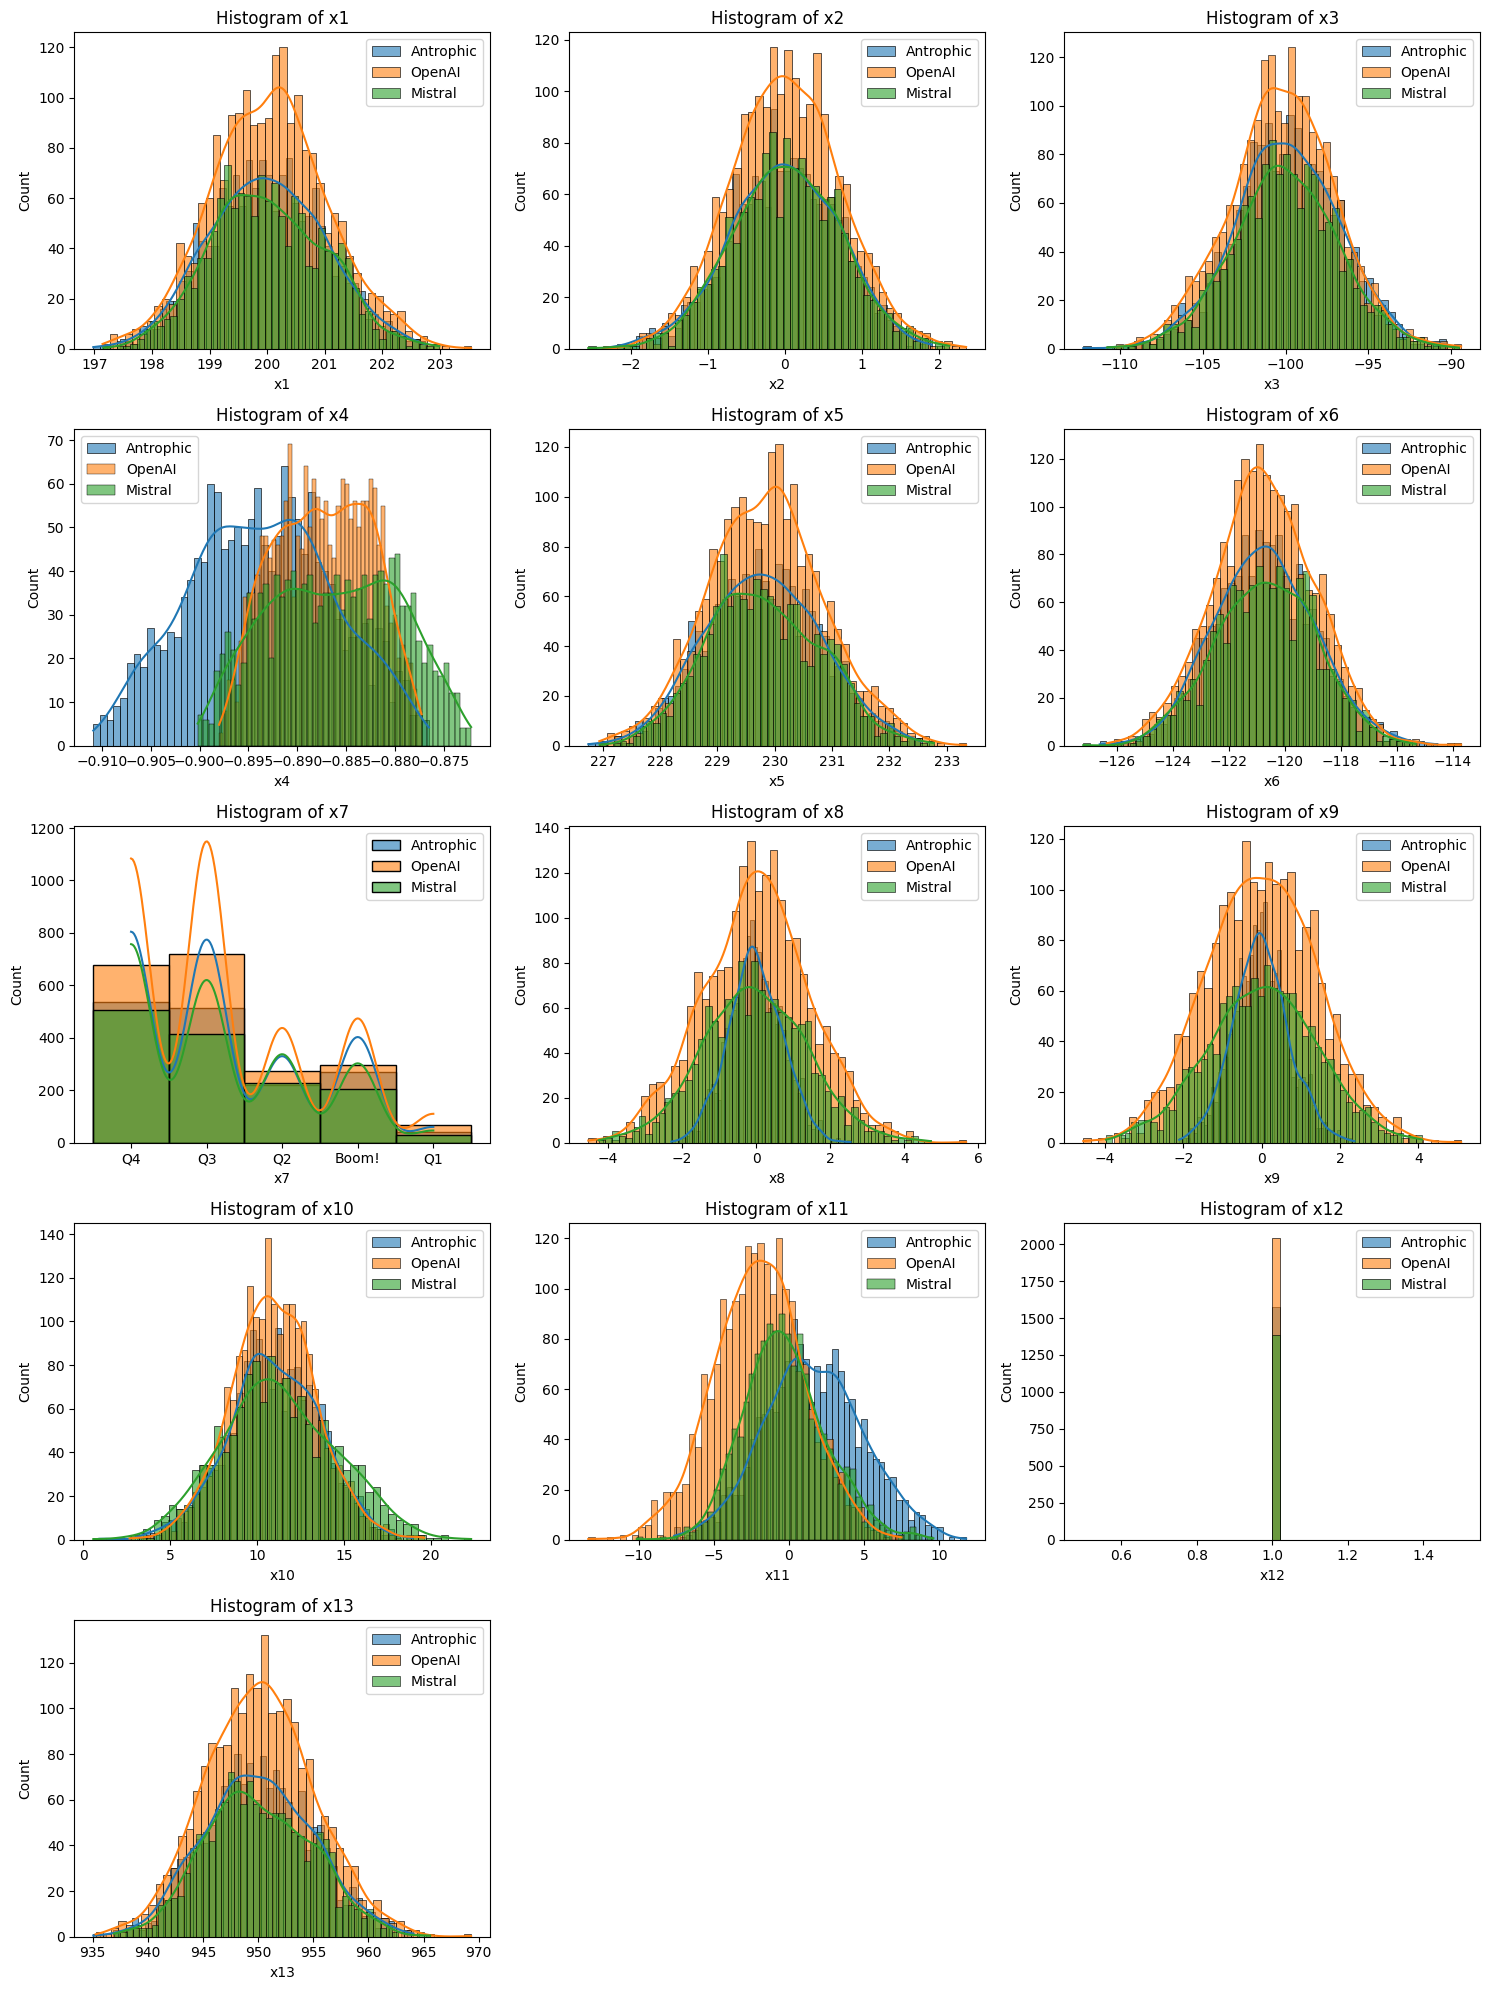

In [5]:
features = [f"x{i}" for i in range(1, 14)]  # List of feature columns
categories = train_raw['y'].unique()  # Unique categories in y

# Set up the figure size
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Iterate through each feature and create a histogram
for i, feature in enumerate(features):
    ax = axes[i]
    
    for category in categories:
        subset = train_raw[train_raw['y'] == category]
        sns.histplot(subset[feature], bins=50, kde=True, label=category, ax=ax, alpha=0.6)
    
    ax.set_title(f"Histogram of {feature}")
    ax.legend()

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


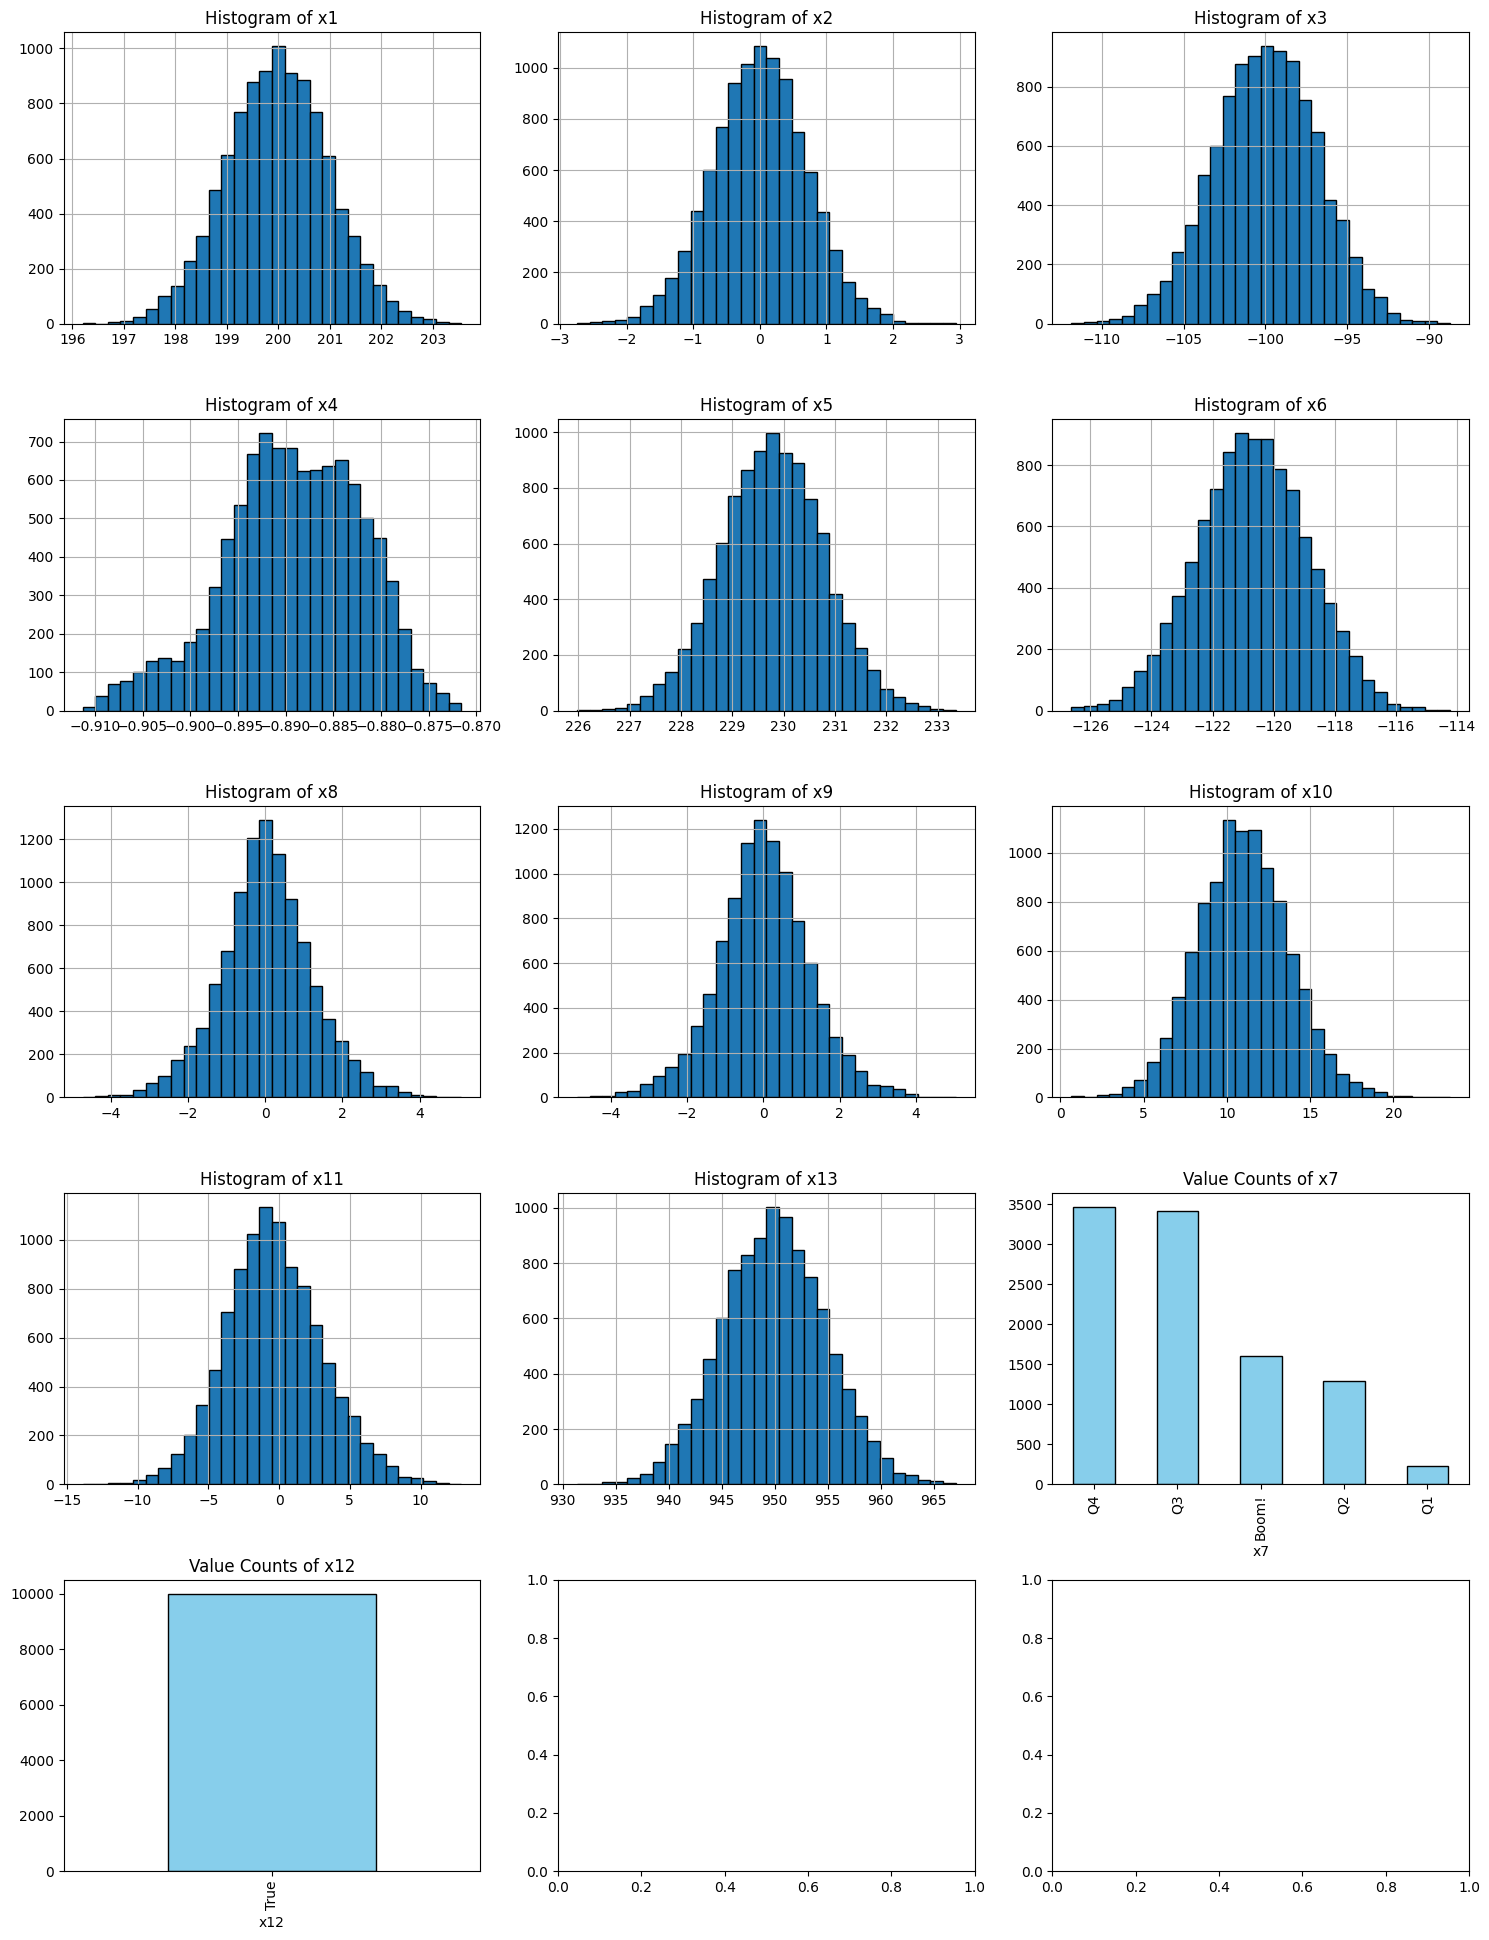

In [6]:
numeric_cols = test_raw.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = test_raw.select_dtypes(include=['object', 'bool']).columns

# Set up subplots
num_plots = len(test_raw.columns)
fig, axes = plt.subplots(nrows=(num_plots // 3) + 1, ncols=3, figsize=(15, num_plots * 1.5))
axes = axes.flatten()

# Plot numeric features as histograms
for i, col in enumerate(numeric_cols):
    test_raw[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")

# Plot categorical and boolean features as bar plots
for i, col in enumerate(categorical_cols, start=len(numeric_cols)):
    test_raw[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f"Value Counts of {col}")

# Adjust layout
plt.tight_layout()
plt.show()


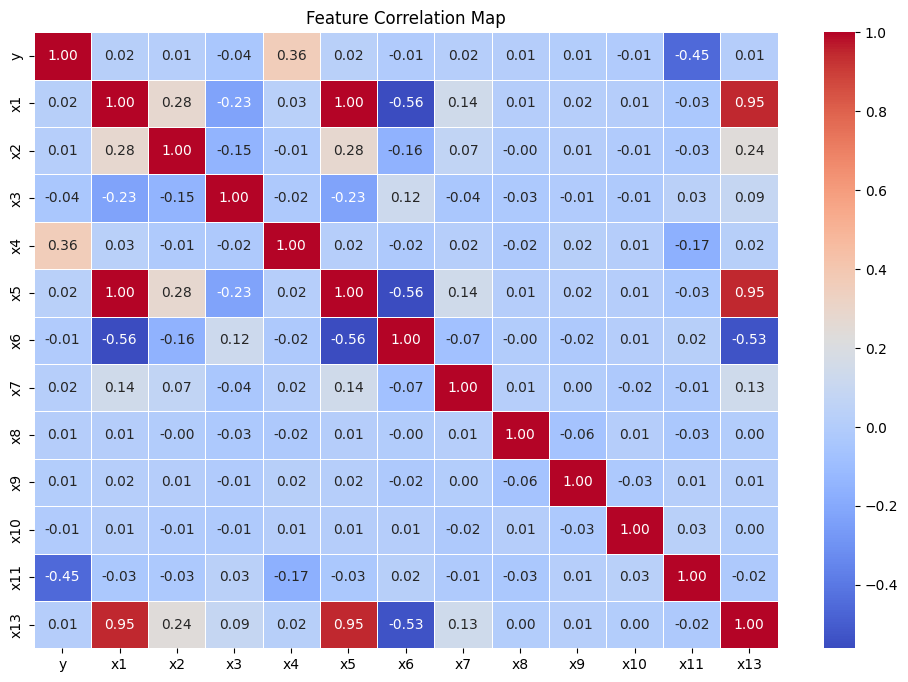

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

selected_features = ['y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x13']
df = train_raw[selected_features].copy()

# Convert boolean features to int
bool_cols = df.select_dtypes(include=['bool']).columns
df[bool_cols] = df[bool_cols].astype(int)

# Convert categorical (string) features using Label Encoding
cat_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert categories to numbers
    label_encoders[col] = le  # Store encoders if needed later

# Compute correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Map")
plt.show()


In [8]:
from sklearn.feature_selection import f_classif

# Compute ANOVA F-score for numerical features
numerical_features = train_raw.select_dtypes(include=['float64', 'int64']).columns
X_num = train_raw[numerical_features]
y = train_raw['y']

anova_f, anova_p = f_classif(X_num, y)
feature_importance = pd.DataFrame({'Feature': numerical_features, 'F-Score': anova_f, 'P-Value': anova_p})
feature_importance = feature_importance.sort_values(by="F-Score", ascending=False)

print(feature_importance)


   Feature     F-Score        P-Value
9      x11  643.360054  2.401895e-249
3       x4  641.254523  1.282248e-248
8      x10    5.667893   3.477389e-03
2       x3    3.787020   2.272811e-02
4       x5    1.624479   1.971183e-01
0       x1    1.042293   3.527219e-01
1       x2    0.779779   4.585630e-01
6       x8    0.655626   5.191617e-01
5       x6    0.475849   6.213858e-01
7       x9    0.376437   6.863216e-01
10     x13    0.170474   8.432700e-01


In [9]:
from sklearn.feature_selection import mutual_info_classif

# Select categorical features
cat_features = train_raw.select_dtypes(include=['object']).columns
X_cat = train_raw[cat_features]

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in cat_features:
    le = LabelEncoder()
    X_cat[col] = le.fit_transform(X_cat[col])

# Compute mutual information
mi_scores = mutual_info_classif(X_cat, y)
mi_scores_df = pd.DataFrame({'Feature': cat_features, 'MI Score': mi_scores}).sort_values(by="MI Score", ascending=False)

print(mi_scores_df)


  Feature  MI Score
0       y  1.085971
1      x7  0.000000


C:\Users\natha\AppData\Local\Temp\ipykernel_12672\1796479453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = le.fit_transform(X_cat[col])
C:\Users\natha\AppData\Local\Temp\ipykernel_12672\1796479453.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cat[col] = le.fit_transform(X_cat[col])


In [10]:
from tools import *
from data import *

In [11]:
unique, counts = np.unique(y_train, return_counts=True)
count_dict = dict(zip(unique, counts))
print(count_dict)


{np.int64(0): np.int64(1577), np.int64(1): np.int64(1384), np.int64(2): np.int64(2039)}


In [12]:
display(X_train)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,199.84675,-0.22935,-94.57266,-0.90297,229.65733,-119.73784,4,0.12045,0.50670,13.31960,2.86055,1,951.94743
1,199.76663,0.57961,-98.69548,-0.89087,229.58771,-117.92856,4,-0.28505,0.16832,14.52734,-0.51453,1,949.48540
2,200.40804,-0.03834,-97.64719,-0.89971,230.20797,-121.71234,3,-0.13753,0.71530,9.90651,0.35612,1,953.21660
3,201.38523,0.51942,-105.16820,-0.89226,231.15781,-120.69422,2,0.03872,-0.37550,11.10684,1.32156,1,954.34203
4,199.60130,-0.76663,-94.42670,-0.88284,229.39822,-122.24543,4,0.46721,2.14220,9.72683,-4.96100,1,950.79316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,199.98926,-0.41084,-96.07238,-0.89343,229.82210,-122.31199,4,-1.46550,-0.52188,9.32058,-5.41452,1,951.91011
4996,198.55424,-1.26159,-100.74327,-0.89437,228.38267,-118.38499,0,-0.50682,1.87498,11.96868,-1.71323,1,942.39957
4997,198.82996,-0.63317,-99.51654,-0.88107,228.61067,-118.17930,0,-0.40644,0.61261,12.00800,-0.66953,1,944.39151
4998,200.17363,-0.36923,-101.12964,-0.89290,229.99216,-120.53125,3,-0.62150,0.97174,10.39919,-6.26654,1,950.30334


In [13]:
display(X_train)
display(X_test)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,199.84675,-0.22935,-94.57266,-0.90297,229.65733,-119.73784,4,0.12045,0.50670,13.31960,2.86055,1,951.94743
1,199.76663,0.57961,-98.69548,-0.89087,229.58771,-117.92856,4,-0.28505,0.16832,14.52734,-0.51453,1,949.48540
2,200.40804,-0.03834,-97.64719,-0.89971,230.20797,-121.71234,3,-0.13753,0.71530,9.90651,0.35612,1,953.21660
3,201.38523,0.51942,-105.16820,-0.89226,231.15781,-120.69422,2,0.03872,-0.37550,11.10684,1.32156,1,954.34203
4,199.60130,-0.76663,-94.42670,-0.88284,229.39822,-122.24543,4,0.46721,2.14220,9.72683,-4.96100,1,950.79316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,199.98926,-0.41084,-96.07238,-0.89343,229.82210,-122.31199,4,-1.46550,-0.52188,9.32058,-5.41452,1,951.91011
4996,198.55424,-1.26159,-100.74327,-0.89437,228.38267,-118.38499,0,-0.50682,1.87498,11.96868,-1.71323,1,942.39957
4997,198.82996,-0.63317,-99.51654,-0.88107,228.61067,-118.17930,0,-0.40644,0.61261,12.00800,-0.66953,1,944.39151
4998,200.17363,-0.36923,-101.12964,-0.89290,229.99216,-120.53125,3,-0.62150,0.97174,10.39919,-6.26654,1,950.30334


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,200.16482,-0.26286,-97.71010,-0.89489,229.96954,-120.53342,3,0.78091,-0.09718,9.52442,3.17744,1,951.96903
1,199.54172,0.40905,-100.63736,-0.88896,229.33501,-120.01444,4,-0.46364,-2.63335,12.39610,-1.47704,1,947.38992
2,201.00071,0.14955,-98.64403,-0.88369,230.76183,-120.01524,2,0.89600,-1.21155,11.46621,4.65774,1,955.68154
3,199.79682,2.10760,-99.21798,-0.88805,229.58575,-118.51331,4,-1.34531,-0.37638,9.08931,0.93612,1,949.37509
4,199.12434,0.41191,-103.65685,-0.88177,228.92722,-118.46355,4,2.15090,1.89268,11.01687,-0.31611,1,943.79329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,198.23317,-0.04672,-97.35953,-0.88230,228.02385,-121.45941,0,1.81188,-1.81356,12.91771,-5.06055,1,942.48610
9996,199.90617,0.42708,-100.51298,-0.89519,229.70554,-122.07958,4,1.46100,-0.36353,9.46819,3.04122,1,949.27436
9997,200.74392,1.06337,-99.16674,-0.88327,230.52623,-122.10346,3,1.81403,-0.62805,12.79995,-3.69950,1,954.13625
9998,200.59772,-0.57665,-100.04636,-0.87773,230.39716,-122.62023,3,-1.62298,-2.15419,15.51824,-1.16185,1,952.96541


In [14]:
display(train_raw)

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
0,Antrophic,199.84675,-0.22935,-94.57266,-0.90297,229.65733,-119.73784,Q4,0.12045,0.50670,13.31960,2.86055,True,951.94743
1,OpenAI,199.76663,0.57961,-98.69548,-0.89087,229.58771,-117.92856,Q4,-0.28505,0.16832,14.52734,-0.51453,True,949.48540
2,Antrophic,200.40804,-0.03834,-97.64719,-0.89971,230.20797,-121.71234,Q3,-0.13753,0.71530,9.90651,0.35612,True,953.21660
3,Antrophic,201.38523,0.51942,-105.16820,-0.89226,231.15781,-120.69422,Q2,0.03872,-0.37550,11.10684,1.32156,True,954.34203
4,OpenAI,199.60130,-0.76663,-94.42670,-0.88284,229.39822,-122.24543,Q4,0.46721,2.14220,9.72683,-4.96100,True,950.79316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,OpenAI,199.98926,-0.41084,-96.07238,-0.89343,229.82210,-122.31199,Q4,-1.46550,-0.52188,9.32058,-5.41452,True,951.91011
4996,OpenAI,198.55424,-1.26159,-100.74327,-0.89437,228.38267,-118.38499,Boom!,-0.50682,1.87498,11.96868,-1.71323,True,942.39957
4997,Mistral,198.82996,-0.63317,-99.51654,-0.88107,228.61067,-118.17930,Boom!,-0.40644,0.61261,12.00800,-0.66953,True,944.39151
4998,OpenAI,200.17363,-0.36923,-101.12964,-0.89290,229.99216,-120.53125,Q3,-0.62150,0.97174,10.39919,-6.26654,True,950.30334
